In [10]:
!unzip "/content/credit_card.zip" -d "/content/data/"

Archive:  /content/credit_card.zip
  inflating: /content/data/creditcard.csv  


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [12]:
# Step 1: Load the dataset
# Assuming the dataset is stored as 'creditcard.csv' (replace with actual path)
df = pd.read_csv('/content/data/creditcard.csv')


In [13]:
# Step 2: Data Preprocessing
# Checking for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [14]:
# Scale the 'Amount' feature (since it's a continuous variable and might need scaling)
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [15]:
# Features (X) and Target (y)
X = df.drop(columns=['Class'])  # Drop the 'Class' column which is the target
y = df['Class']  # 'Class' column is the label: 1 for fraud, 0 for non-fraud


In [16]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [17]:
# Step 4: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

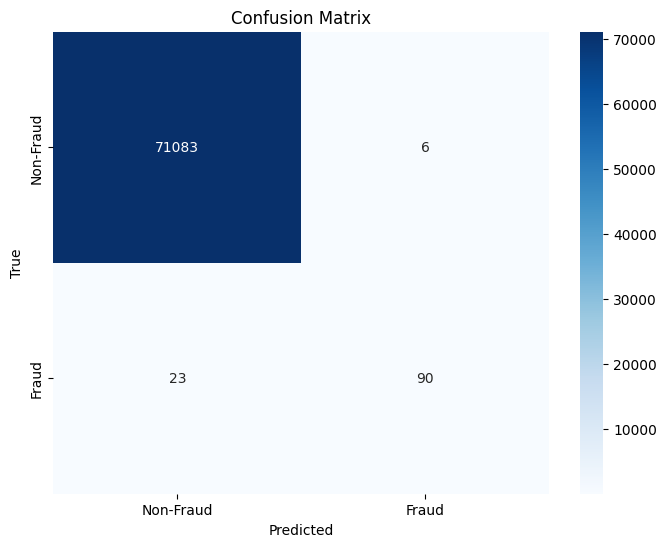

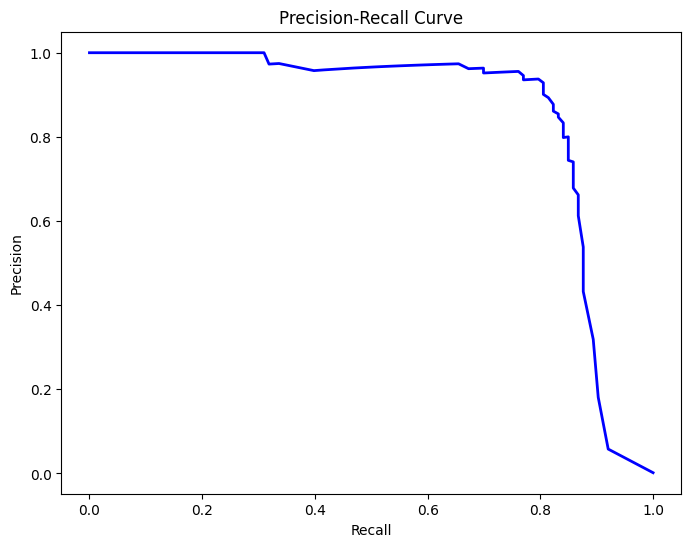

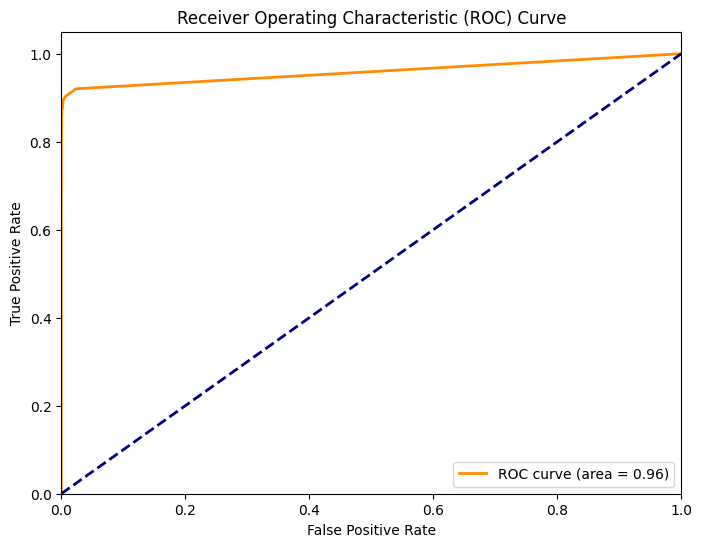

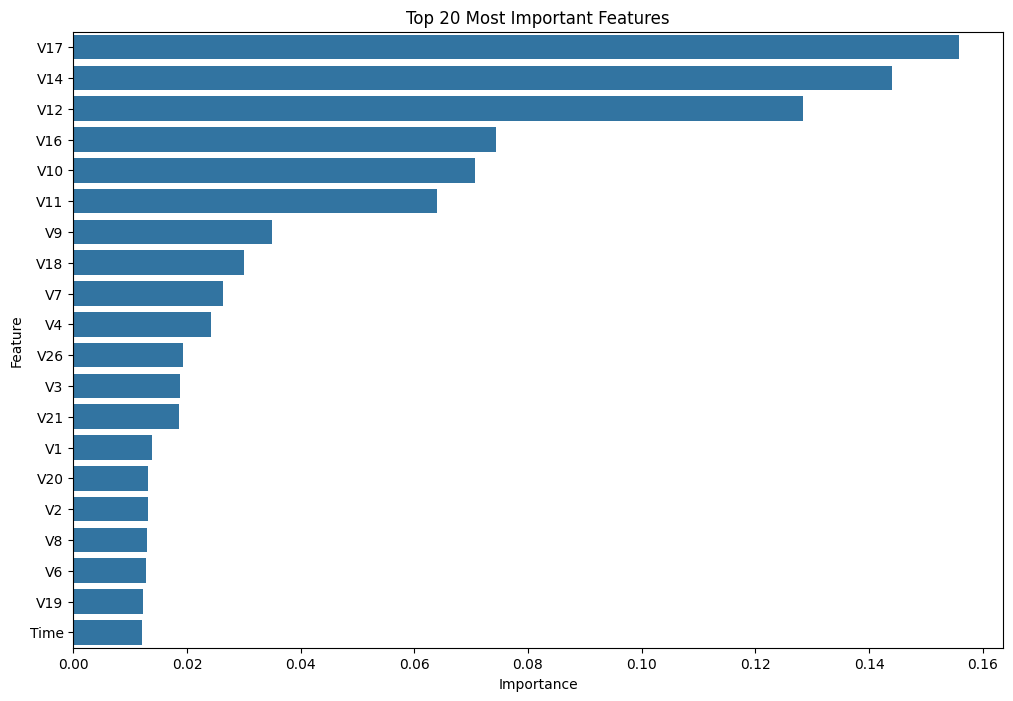

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Assuming you already have rf_model trained and y_test, y_pred defined
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Step 1: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 2: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Step 3: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 4: Feature Importance Visualization
feature_importances = rf_model.feature_importances_

# Create a dataframe to visualize feature importance
feature_names = X.columns
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
plt.title("Top 20 Most Important Features")
plt.show()
